In [1]:
import numpy as np 
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

!pip install catboost
!pip install lightgbm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression

C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
data = pd.read_csv('C:/Users/KIIT/Desktop/Minor_Project/Integration & Testing/Dataset/Preprocessed_dataset_17-03-24.csv')
data.head()

,Unnamed: 0.1,Unnamed: 0,channel_id,video_id,video_title,published_date,views,likes,comments,duration,title_len,duration_sec
0,0,0,UC-lHJZR3Gqxm24_Vd_AJ5Yw,_flqrzcGhrE,I survived being Alone In The Dark...,2024-03-15,1043073,82518,2716,0:24:15,37,1455
1,1,1,UC-lHJZR3Gqxm24_Vd_AJ5Yw,YWrFNoTXbKs,Our Winter Trip!,2024-03-08,1314907,93991,3396,0:23:27,16,1407
2,2,2,UC-lHJZR3Gqxm24_Vd_AJ5Yw,wycmfVWKWlw,Only 99.9% Can SOLVE this - Brain It On,2023-04-29,2959241,204992,4370,0:14:48,39,888
3,3,3,UC-lHJZR3Gqxm24_Vd_AJ5Yw,DEgt25yYidY,Gordon Ramsey VS Woman in COMPLETE denial,2023-02-15,4441747,203208,5733,0:24:06,41,1446
4,4,4,UC-lHJZR3Gqxm24_Vd_AJ5Yw,vDZHCYCd5Bo,My 7 Billion $ Setup Tour,2022-07-01,6624830,353406,11503,0:22:03,25,1323


In [5]:
data = data.drop('Unnamed: 0.1', axis=1)
data.dtypes

Unnamed: 0         int64
channel_id        object
video_id          object
video_title       object
published_date    object
views              int64
likes              int64
comments           int64
duration          object
title_len          int64
duration_sec       int64
dtype: object

In [6]:
# updating the index of the dataset to 'published_date'
data.index = pd.to_datetime(data.published_date)

### Calculating P-value
Looking If data set is Stationary or non stationary using Augmented Dicky Fuller method...
If P-value > 0.05 then given column is non-stationary else stationary

Stationary : If data contains almost constant mean, variance \ Non-Stationary : Mean, Variance change over time

In [7]:
print(f"P-Value: {adfuller(data['views'])[1]}")
print(f"P-Value: {adfuller(data['likes'])[1]}")

P-Value: 2.3473078426757937e-05
P-Value: 0.0006924512461877974


## Exploratory Data analysis

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

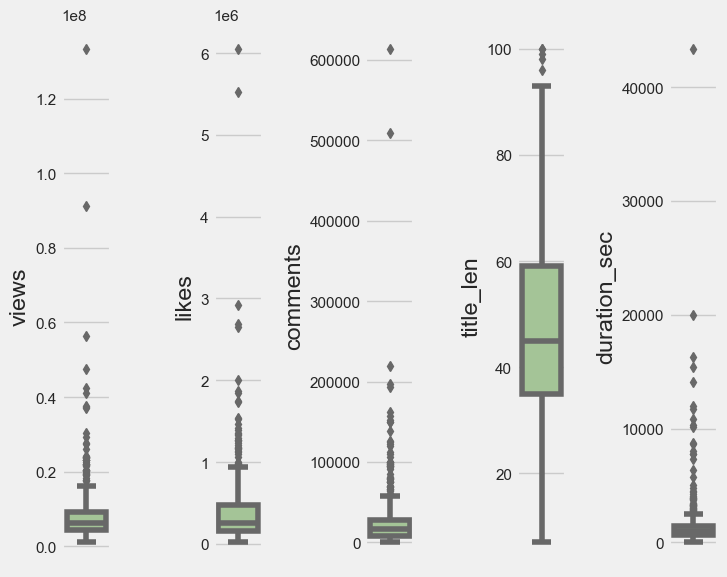

In [9]:
# Distribution of data with boxplot
features = ['views','likes','comments','title_len','duration_sec']
plt.figure(figsize=(7.5, 6))
for i in range(0, len(features)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=data[features[i]],color='#A1CB90',orient='v')
    plt.tight_layout()

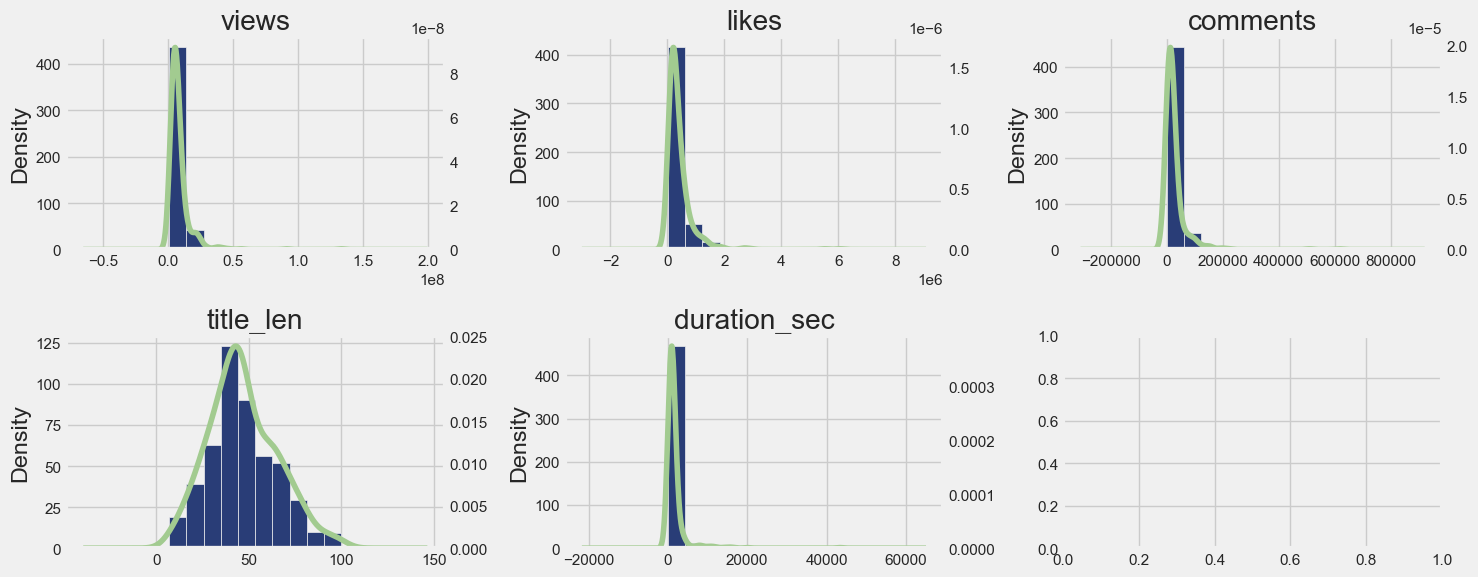

In [10]:
#View data distribution
data_num = data[features]
k = len(data_num.columns)
n = 3
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(data_num.items()):
    r, c = i // n, i % n
    ax = axes[r,c]
    col.hist(ax=ax, color='#293D77')
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name, color='#A2CB90')
    ax2.set_ylim(0)

fig.tight_layout()

<Axes: >

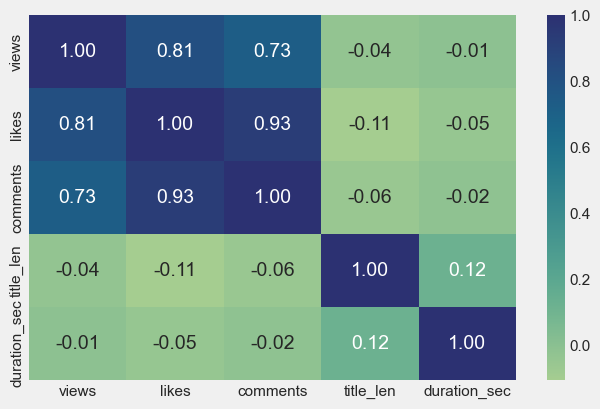

In [27]:
#Multivariate Analysis

#create a correlation matrix from each numeric data
features = ['views','likes','comments','title_len','duration_sec']
corr_= data[features].corr()
plt.figure(figsize=(7,4.5))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "crest")

C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 400x350 with 0 Axes>

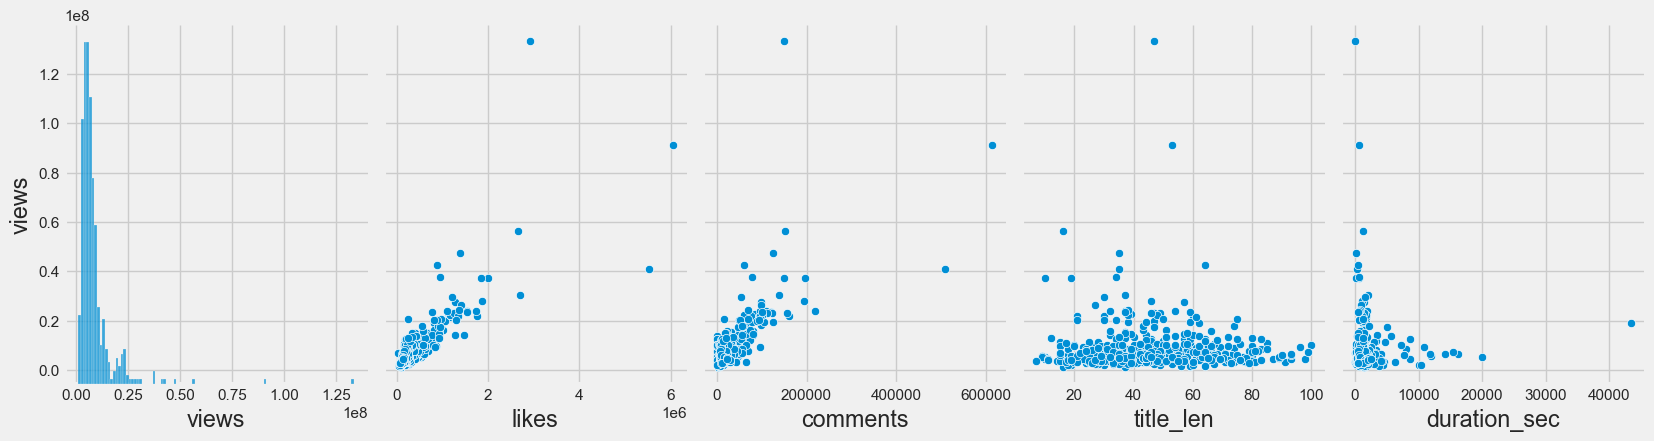

In [24]:
#create a pairplot chart from any numeric data
plt.figure(figsize=(4,3.5))
sns.pairplot(data=data, x_vars=['views','likes','comments','title_len','duration_sec'], y_vars=['views'], height=4.5, aspect=0.75)

## Views Plot

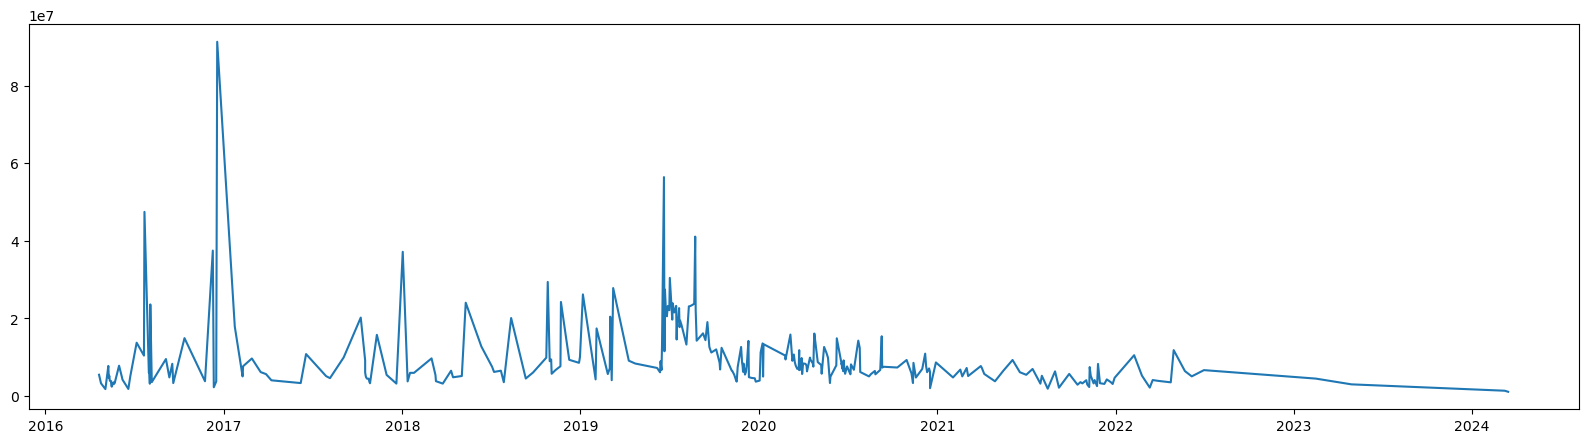

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcdefaults()

# Line Plot
plt.figure(figsize = (20,5))
plt.plot(data['views'][:300])
plt.show()

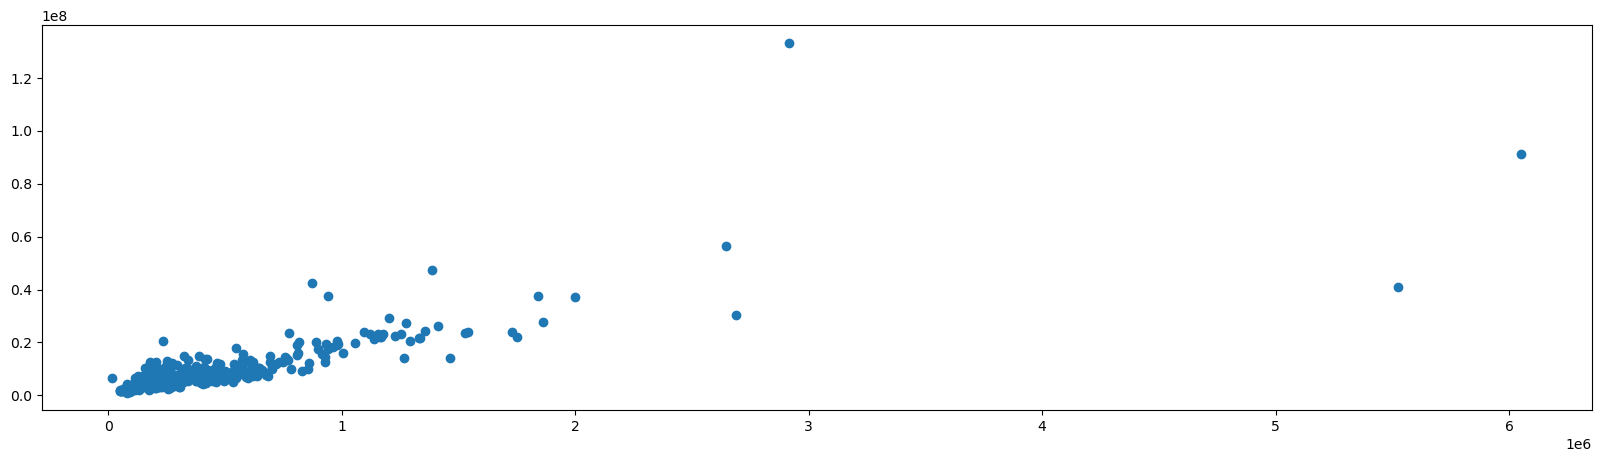

In [31]:
# Scatter Plot
plt.figure(figsize = (20,5))
plt.scatter(data['likes'],data['views'])
plt.show()

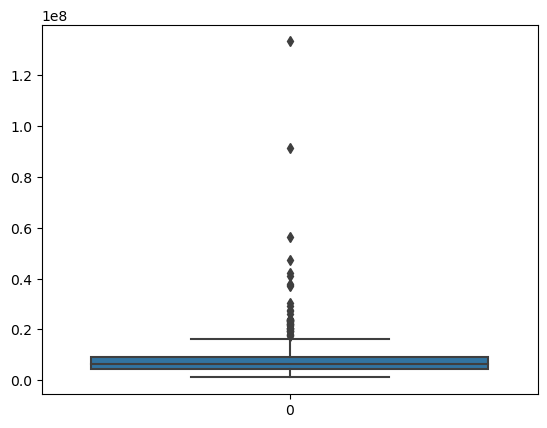

In [32]:
# Box Plot
sns.boxplot(data['views'])
plt.show()

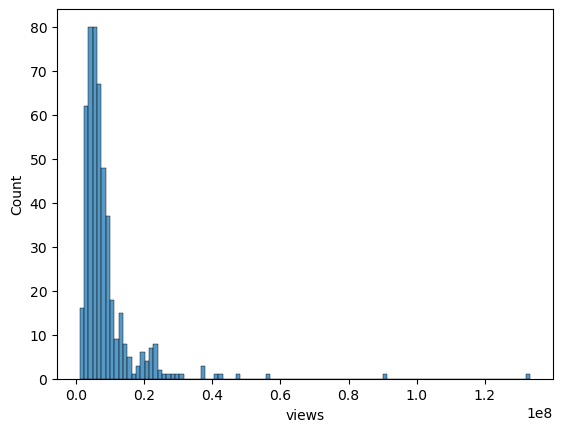

In [33]:
# Histogram 
sns.histplot(data['views'])
plt.show()

- Both Boxplot and Histgram plots indicate strong Right skewness. 
- Which is a bad data distribution. 
- To remove right skewness,we can use simple log transformation

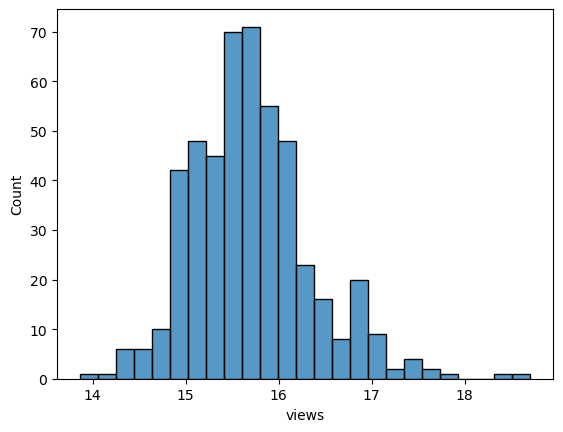

In [34]:
data['views'] = np.log(data['views'])
sns.histplot(data['views'])
plt.show()

<Axes: xlabel='published_date'>

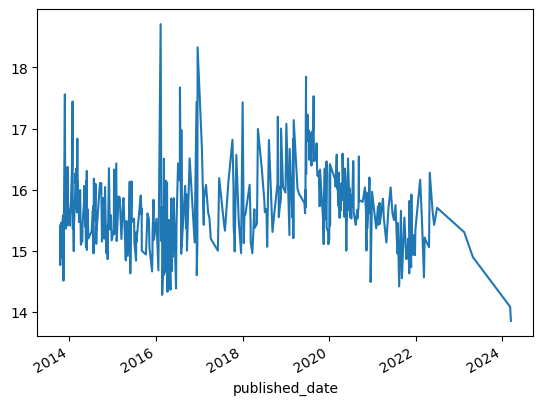

In [35]:
data.views.plot()

In [37]:
print(data.dtypes)
data.index = pd.to_datetime(data.published_date)

Unnamed: 0          int64
channel_id         object
video_id           object
video_title        object
published_date     object
views             float64
likes               int64
comments            int64
duration           object
title_len           int64
duration_sec        int64
dtype: object


In [38]:
data = data[data['views'] != 0]
data['views']=data['views'].replace(0,data['views'].mean())
data['likes']=data['likes'].replace(0,data['likes'].mean())
data['comments']=data['comments'].replace(0,data['comments'].mean())

In [39]:
import numpy as np
np.isfinite(data['views'])

published_date
2024-03-15    True
2024-03-08    True
2023-04-29    True
2023-02-15    True
2022-07-01    True
              ... 
2013-10-14    True
2013-10-14    True
2013-10-16    True
2013-10-16    True
2013-10-15    True
Name: views, Length: 490, dtype: bool

### Removing any data discrepancy 

In [40]:
data[data.index.isin(np.isfinite(data[['views']]).query('not views').index)]

,Unnamed: 0,channel_id,video_id,video_title,published_date,views,likes,comments,duration,title_len,duration_sec
published_date,,,,,,,,,,,


In [41]:
data.index

DatetimeIndex(['2024-03-15', '2024-03-08', '2023-04-29', '2023-02-15',
               '2022-07-01', '2022-06-06', '2022-05-23', '2022-04-30',
               '2022-04-24', '2022-03-29',
               ...
               '2013-10-17', '2013-10-16', '2013-10-16', '2013-10-15',
               '2013-10-15', '2013-10-14', '2013-10-14', '2013-10-16',
               '2013-10-16', '2013-10-15'],
              dtype='datetime64[ns]', name='published_date', length=490, freq=None)

In [42]:
req_index = data[data.index.isin(np.isfinite(data[['views']]).query('not views').index)].index
data.drop(req_index, inplace=True)

data[data.index.isin(np.isfinite(data[['views']]).query('not views').index)]

,Unnamed: 0,channel_id,video_id,video_title,published_date,views,likes,comments,duration,title_len,duration_sec
published_date,,,,,,,,,,,


In [43]:
data.sort_index(inplace=True)
data

,Unnamed: 0,channel_id,video_id,video_title,published_date,views,likes,comments,duration,title_len,duration_sec
published_date,,,,,,,,,,,
2013-10-14,499,UC-lHJZR3Gqxm24_Vd_AJ5Yw,fLRCCDWKknA,DETECTIVE PEWDS IN ACTION! - The Wolf Among Us...,2013-10-14,14.875308,79798,8560,0:21:06,79,1266
2013-10-14,498,UC-lHJZR3Gqxm24_Vd_AJ5Yw,AxoDPIFJYcE,"MY NEW LOOK! - Beyond: Two Souls - Gameplay, W...",2013-10-14,15.418633,153940,23577,0:37:17,65,2237
2013-10-15,502,UC-lHJZR3Gqxm24_Vd_AJ5Yw,kSb2rmREiQ4,LIFE AT THE FARM - Beyond: Two Souls - Gamepla...,2013-10-15,15.258142,134926,23070,0:41:09,69,2469
2013-10-15,497,UC-lHJZR3Gqxm24_Vd_AJ5Yw,P3UQMqojJrg,"MY ARM! - The Wolf Among Us - Gameplay, Playth...",2013-10-15,14.951762,74464,65406,0:27:16,60,1636
2013-10-15,496,UC-lHJZR3Gqxm24_Vd_AJ5Yw,kSb2rmREiQ4,LIFE AT THE FARM - Beyond: Two Souls - Gamepla...,2013-10-15,15.258142,134926,23070,0:41:09,69,2469
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,4,UC-lHJZR3Gqxm24_Vd_AJ5Yw,vDZHCYCd5Bo,My 7 Billion $ Setup Tour,2022-07-01,15.706335,353406,11503,0:22:03,25,1323
2023-02-15,3,UC-lHJZR3Gqxm24_Vd_AJ5Yw,DEgt25yYidY,Gordon Ramsey VS Woman in COMPLETE denial,2023-02-15,15.306558,203208,5733,0:24:06,41,1446
2023-04-29,2,UC-lHJZR3Gqxm24_Vd_AJ5Yw,wycmfVWKWlw,Only 99.9% Can SOLVE this - Brain It On,2023-04-29,14.900443,204992,4370,0:14:48,39,888


In [44]:
result = seasonal_decompose(data['views'],model='multiplicative', period=10)

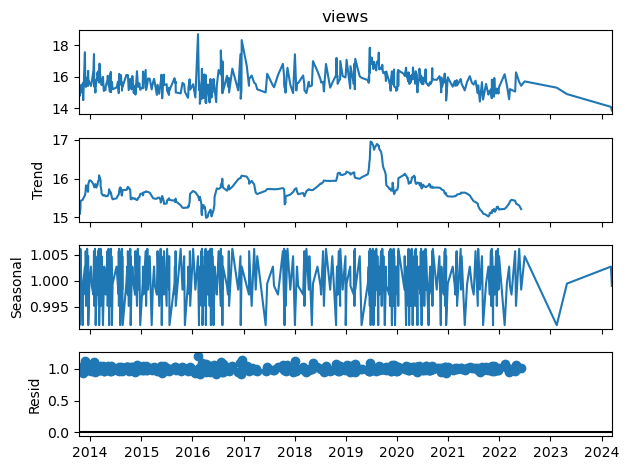

In [45]:
result.plot();

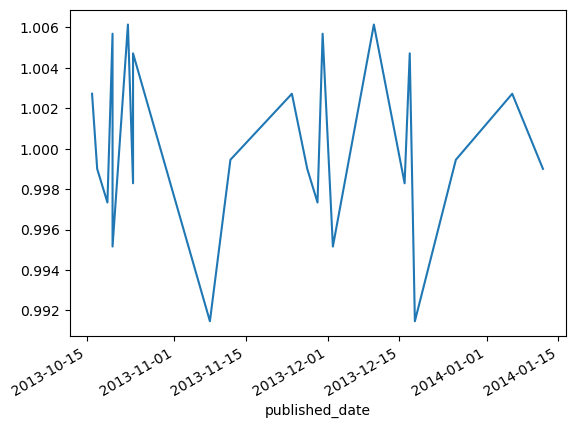

In [46]:
result.seasonal[8:30].plot();

## Spliting dataset into training & testing dataset

In [47]:
train_size = int(len(data)*.7)
print(train_size,len(data))

343 490


In [53]:
train = data.iloc[:train_size]
test = data.iloc[train_size:]
#train_feature = train.drop(columns = ['views'])
train_feature = train.drop(columns = ['published_date','views','channel_id','video_id','video_title','duration'])
train_label = train[['views']]
train_feature

,Unnamed: 0,likes,comments,title_len,duration_sec
published_date,,,,,
2013-10-14,499,79798,8560,79,1266
2013-10-14,498,153940,23577,65,2237
2013-10-15,502,134926,23070,69,2469
2013-10-15,497,74464,65406,60,1636
2013-10-15,496,134926,23070,69,2469
...,...,...,...,...,...
2019-10-14,151,309507,19427,23,1616
2019-10-17,150,466537,25225,75,1367
2019-11-07,149,597033,50499,52,592


# Train data using default features with CatBoost regressor

In [54]:
model = CatBoostRegressor(silent =True)
model.fit(train_feature,train_label)

1090227.57053165


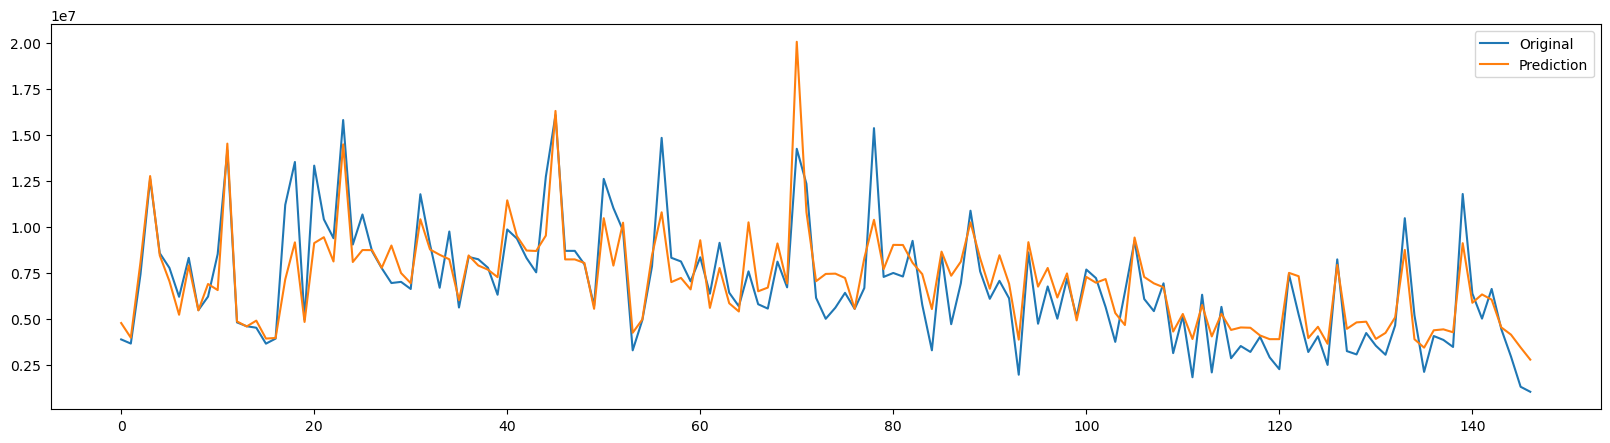

In [55]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

plt.figure(figsize = (20,5))
test_feature = test.drop(columns = ['published_date','views','channel_id','video_id','video_title','duration'])
test_label = test[['views']]
pred = model.predict(test_feature)
test_label = np.exp(test_label)
pred = np.exp(pred)
print(mean_absolute_error(test_label,pred))
plt.plot(np.array(test_label),label="Original")
plt.plot(np.array(pred),label="Prediction")
plt.legend()
plt.show()

In [56]:
# Accuracy Scores
import sklearn.metrics as metrics


mae = metrics.mean_absolute_error(test_label,pred)
mse = metrics.mean_squared_error(test_label,pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test_label,pred)

print("Results of CatBoost Regressor :")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of CatBoost Regressor :
MAE: 1090227.57053165
MSE: 2225411266758.426
RMSE: 1491781.23957852
R-Squared: 0.7724263623985665


# Adding more Features, Again train using CatBoost, Linear & LightBoost algos

In [57]:
data['year'] = data.index.year
data['month'] = data.index.month
# data['date'] = data.index.day

data.head()

,Unnamed: 0,channel_id,video_id,video_title,published_date,views,likes,comments,duration,title_len,duration_sec,year,month
published_date,,,,,,,,,,,,,
2013-10-14,499,UC-lHJZR3Gqxm24_Vd_AJ5Yw,fLRCCDWKknA,DETECTIVE PEWDS IN ACTION! - The Wolf Among Us...,2013-10-14,14.875308,79798,8560,0:21:06,79,1266,2013,10
2013-10-14,498,UC-lHJZR3Gqxm24_Vd_AJ5Yw,AxoDPIFJYcE,"MY NEW LOOK! - Beyond: Two Souls - Gameplay, W...",2013-10-14,15.418633,153940,23577,0:37:17,65,2237,2013,10
2013-10-15,502,UC-lHJZR3Gqxm24_Vd_AJ5Yw,kSb2rmREiQ4,LIFE AT THE FARM - Beyond: Two Souls - Gamepla...,2013-10-15,15.258142,134926,23070,0:41:09,69,2469,2013,10
2013-10-15,497,UC-lHJZR3Gqxm24_Vd_AJ5Yw,P3UQMqojJrg,"MY ARM! - The Wolf Among Us - Gameplay, Playth...",2013-10-15,14.951762,74464,65406,0:27:16,60,1636,2013,10
2013-10-15,496,UC-lHJZR3Gqxm24_Vd_AJ5Yw,kSb2rmREiQ4,LIFE AT THE FARM - Beyond: Two Souls - Gamepla...,2013-10-15,15.258142,134926,23070,0:41:09,69,2469,2013,10


In [58]:
train = data.iloc[:train_size]
test = data.iloc[train_size:]
train_feature = train.drop(columns = ['published_date','views','channel_id','video_id','video_title','duration'])
train_label = train[['views']]
model = CatBoostRegressor(silent=True)
model.fit(train_feature,train_label)

1236006.4449405882


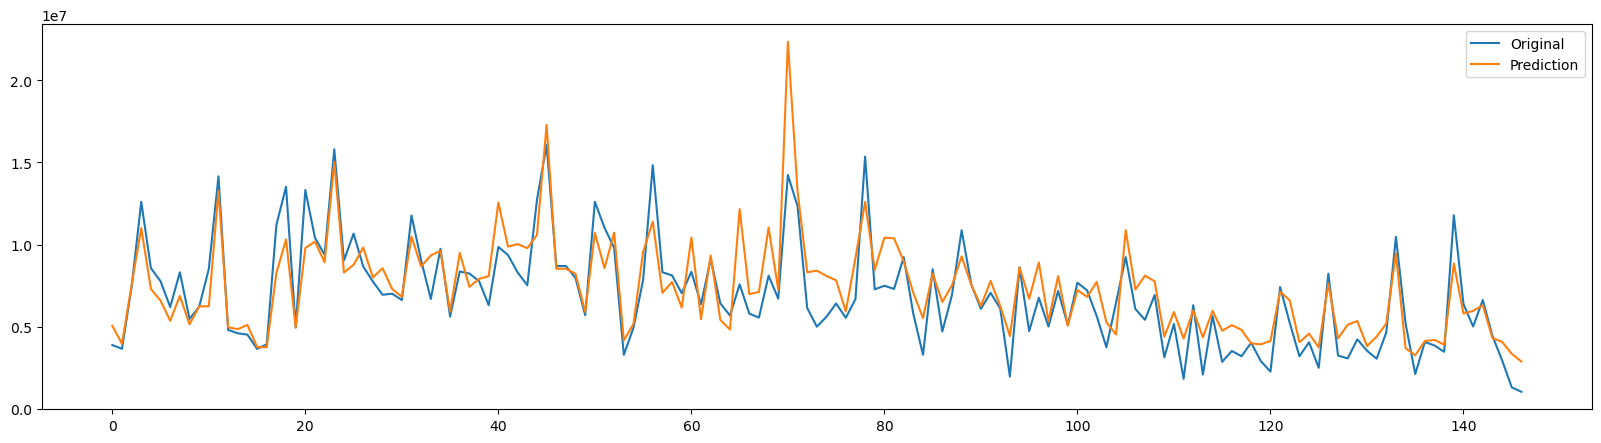

In [59]:
plt.figure(figsize = (20,5))
test_feature = test.drop(columns = ['published_date','views','channel_id','video_id','video_title','duration'])
test_label = test[['views']]
pred = model.predict(test_feature)
test_label = np.exp(test_label)
pred = np.exp(pred)
print(mean_absolute_error(test_label,pred))
plt.plot(np.array(test_label),label="Original")
plt.plot(np.array(pred),label="Prediction")
plt.legend()
plt.show()

In [60]:
# Accuracy Scores
import sklearn.metrics as metrics


mae = metrics.mean_absolute_error(test_label,pred)
mse = metrics.mean_squared_error(test_label,pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test_label,pred)

print("Results of CatBoost Regressor :")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of CatBoost Regressor :
MAE: 1236006.4449405882
MSE: 2730609335525.327
RMSE: 1652455.5472161202
R-Squared: 0.7207641083532861


In [61]:
lr = LinearRegression()
lr.fit(train_feature,train_label)

LinearRegression()

1869758.8027990877


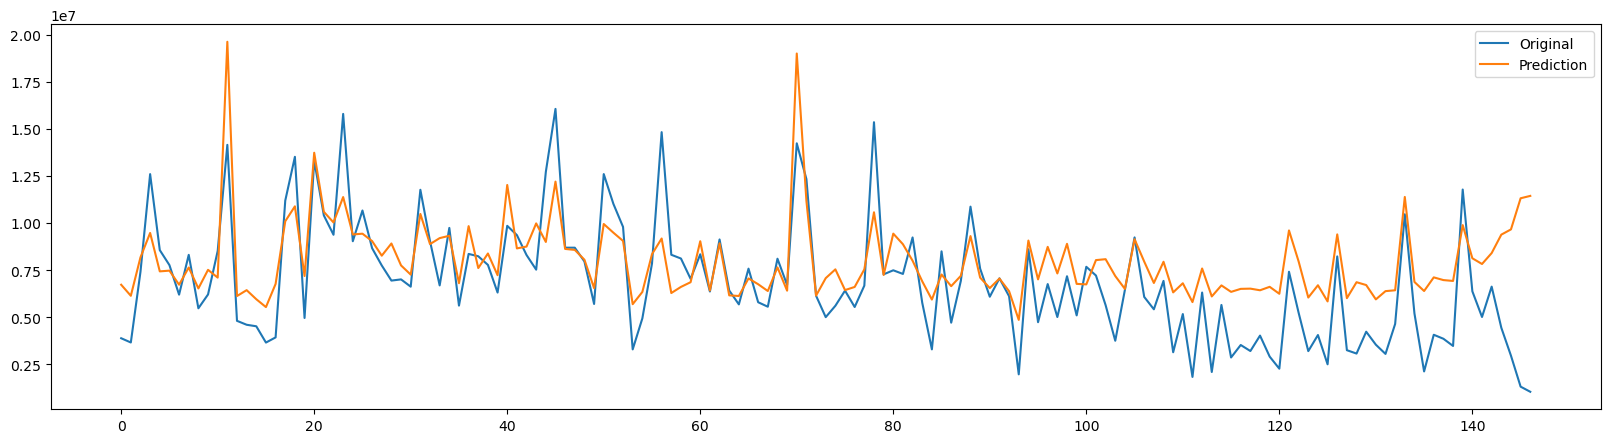

In [62]:
plt.figure(figsize = (20,5))
test_feature = test.drop(columns = ['published_date','views','channel_id','video_id','video_title','duration'])
test_label = test[['views']]
pred = lr.predict(test_feature)
test_label = np.exp(test_label)
pred = np.exp(pred)
print(mean_absolute_error(test_label,pred))
plt.plot(np.array(test_label),label="Original")
plt.plot(np.array(pred),label="Prediction")
plt.legend()
plt.show()

In [63]:
# Accuracy Scores
import sklearn.metrics as metrics


mae = metrics.mean_absolute_error(test_label,pred)
mse = metrics.mean_squared_error(test_label,pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test_label,pred)

print("Results of Linear Regression :")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of Linear Regression :
MAE: 1869758.8027990877
MSE: 6259762196428.326
RMSE: 2501951.6774766706
R-Squared: 0.35986805008129186


In [64]:
train_feature = train.drop(columns = ['published_date','views','channel_id','video_id','video_title','duration','Unnamed: 0'])

In [65]:
lgb = LGBMRegressor()
lgb.fit(train_feature,train_label)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000957 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 343, number of used features: 6
[LightGBM] [Info] Start training from score 15.732313
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

LGBMRegressor()

1869758.8027990877


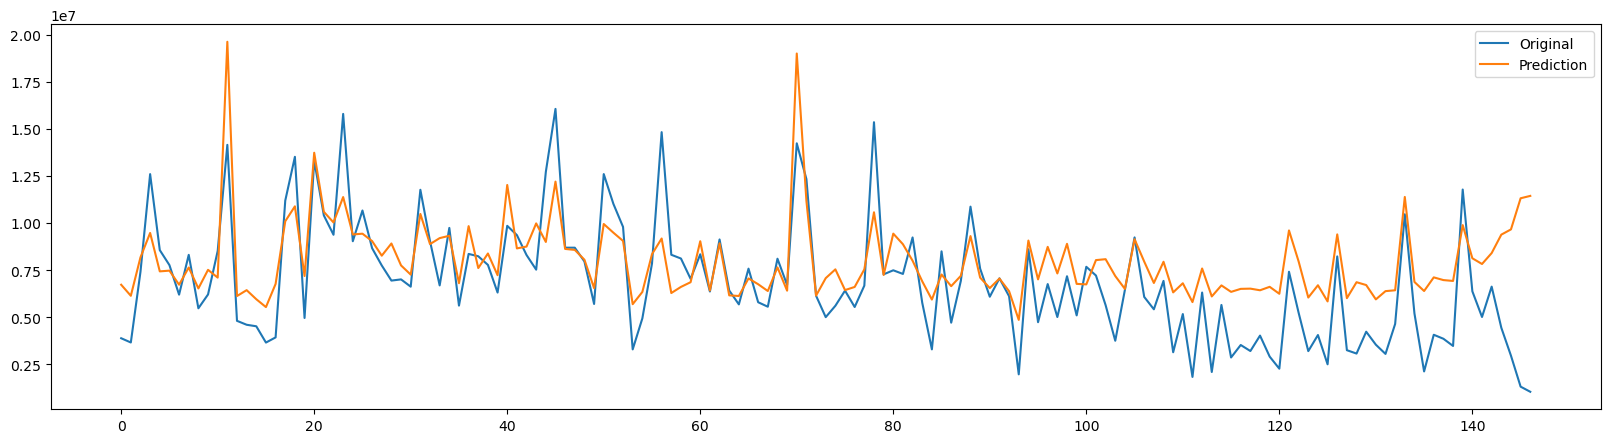

In [67]:
plt.figure(figsize = (20,5))
test_feature = test.drop(columns = ['published_date','views','channel_id','video_id','video_title','duration','Unnamed: 0'])
test_label = test[['views']]
pred = lgb.predict(test_feature)
test_label = np.exp(test_label)
pred = np.exp(pred)
print(mean_absolute_error(test_label,pred))
plt.plot(np.array(test_label),label="Original")
plt.plot(np.array(pred),label="Prediction")
plt.legend()
plt.show()

In [68]:
# Regression Accuracy check
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(test_label,pred)
mse = metrics.mean_squared_error(test_label,pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test_label,pred)

print("Results of LGBM Regressor :")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of LGBM Regressor :
MAE: 1869758.8027990877
MSE: 6259762196428.326
RMSE: 2501951.6774766706
R-Squared: 0.35986805008129186


### Different Regressors & their R-Squared scores :-
- CatBoost Regressor (Without adding more features) : 0.7724263623985665
- CatBoost Regressor (On Adding more features) : 0.7207641083532861
- Linear Regressor : 0.35986805008129186
- LGBM Regressor : 0.35986805008129186


## So, on comparing the R-Squared score of the different regressors 
## We came to a conclusion that the CatBoost Regressor(Without additional month & year features) is the best among them for predicting YouTube views 